## Prediction of Sepsis in ICU Patients

The CRISP-DM (Cross Industry Standard Process for Data Mining) framework is a robust methodology for carrying out data mining projects. It is comprised of six major phases:

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

### Business Understanding

**Objective:**
To predict whether a patient in the ICU will develop sepsis based on various medical attributes. Sepsis is a serious medical condition, and early prediction can significantly improve patient outcomes by enabling timely intervention and treatment.

**Business Goals:**

* **Improve Patient Outcomes:** By predicting the likelihood of sepsis, medical staff can take preventive measures to treat patients more effectively and reduce mortality rates.
* **Optimize Resource Allocation:** Early prediction of sepsis can help in better allocation of medical resources, ensuring that high-risk patients receive immediate attention.
* **Cost Reduction:** Preventing sepsis can significantly reduce healthcare costs associated with prolonged ICU stays, complex treatments, and post-sepsis complications.

**Key Questions:**

* What are the primary medical attributes that contribute to the development of sepsis?
* How accurately can we predict sepsis in ICU patients using the given dataset?
* What is the impact of missing values on the prediction model, and how can they be handled?
* How do demographic factors such as age and insurance status influence the likelihood of developing sepsis?
* What role do comorbidities and previous medical history play in the prediction of sepsis?
* How does the time of admission and length of stay in the ICU affect the risk of developing sepsis?

### Hypothesis

**Null Hypothesis (H0):**  
Using a comprehensive dataset (vital signs, lab results, demographics) does not significantly improve sepsis prediction accuracy in ICU patients compared to using basic medical attributes.

**Alternative Hypothesis (H1):**  
Using a comprehensive dataset (vital signs, lab results, demographics) significantly improves sepsis prediction accuracy in ICU patients.

### Primary Medical Attributes Contributing to Sepsis Development
- Vital signs (e.g., blood pressure, heart rate)
- Laboratory results indicating infection or organ dysfunction
- Patient demographics and medical history

### Predicting Sepsis in ICU Patients
- How accurately can we predict sepsis using the given dataset?
- What impact do missing values have on the prediction model, and how can they be managed?

### Success Criteria
1. **Model Accuracy**
   - Achieve high accuracy, sensitivity, and specificity in predicting sepsis.
2. **Timely Predictions**
   - Ensure predictions are made early enough to allow for effective intervention.
3. **Practical Implementation**
   - Ensure the model is easy to integrate into existing hospital systems and workflows.

### Data Understanding

#### Initial Data Collection
- The dataset includes several attributes related to patient health metrics and demographics.
- Each patient has a unique ID, and the target variable is whether the patient develops sepsis (Sepsis).

#### Data Description
- Understanding sepsis and its common contributing factors is crucial to identify non-informative attributes.
- Sepsis is a life-threatening condition caused by the body's response to an infection injuring its own tissues and organs.


## Data Understanding

Here's a brief analysis of each factor listed:

| Factor | Description                                                                | Can Identify Sepsis? |
|---|---|---|
| ID | Unique identifier for each patient (administrative use, not clinical).            | No |
| PRG | Plasma glucose levels (can be related to metabolic stress but not directly indicative of sepsis). | Maybe |
| PL | Blood Work Result-1 (without specific details, it's unclear if this is relevant).  | Maybe |
| PR | Blood Pressure (critical for identifying septic shock, a severe sepsis condition). | Yes |
| SK | Blood Work Result-2 (without specific details, it's unclear if this is relevant).  | Maybe |
| TS | Blood Work Result-3 (without specific details, it's unclear if this is relevant).  | Maybe |
| M11 | Body mass index (BMI) (can indicate general health but not directly indicative of sepsis). | Maybe |
| BD2 | Blood Work Result-4 (without specific details, it's unclear if this is relevant).  | Maybe |
| Age | Age of the patient (older age can be a risk factor for sepsis).                     | Yes |
| Insurance | Indicator if the patient holds a valid insurance card (administrative use, not clinical). | Yes |

From this list, the factors that cannot help identify if a patient will develop sepsis or not are primarily administrative or not directly related to clinical indicators of infection and organ dysfunction:

* ID: Unique identifier for each patient.
* Insurance: Indicator if the patient holds a valid insurance card.
* M11: Body mass index (BMI).

While BMI and age can influence overall health, they are not direct indicators for the diagnosis of sepsis. The unique identifier (ID) and insurance status are entirely administrative and do not contribute to clinical decision-making regarding sepsis.

In [4]:
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn import set_config
import joblib
from imblearn.over_sampling import RandomOverSampler

from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [5]:
df = pd.read_csv("../datasets/Paitients_Files_Train.csv")
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
df['Insurance'].unique()

array([0, 1])

In [7]:
df['Insurance'] = df['Insurance'].replace({0: 'invalid', 1: 'valid'})

In [8]:
# Convert categorical columns to appropriate types
#df['Sepssis'] = df['Sepssis'].map({'Positive': 1, 'Negative': 0})
#df['Insurance'] = df['Insurance'].astype('category')

In [9]:
df.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,invalid,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,invalid,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,valid,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,valid,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,valid,Positive


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    object 
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 51.6+ KB


In [11]:
df.isna().sum()


ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00


## Univeriate analysis
### Histogram

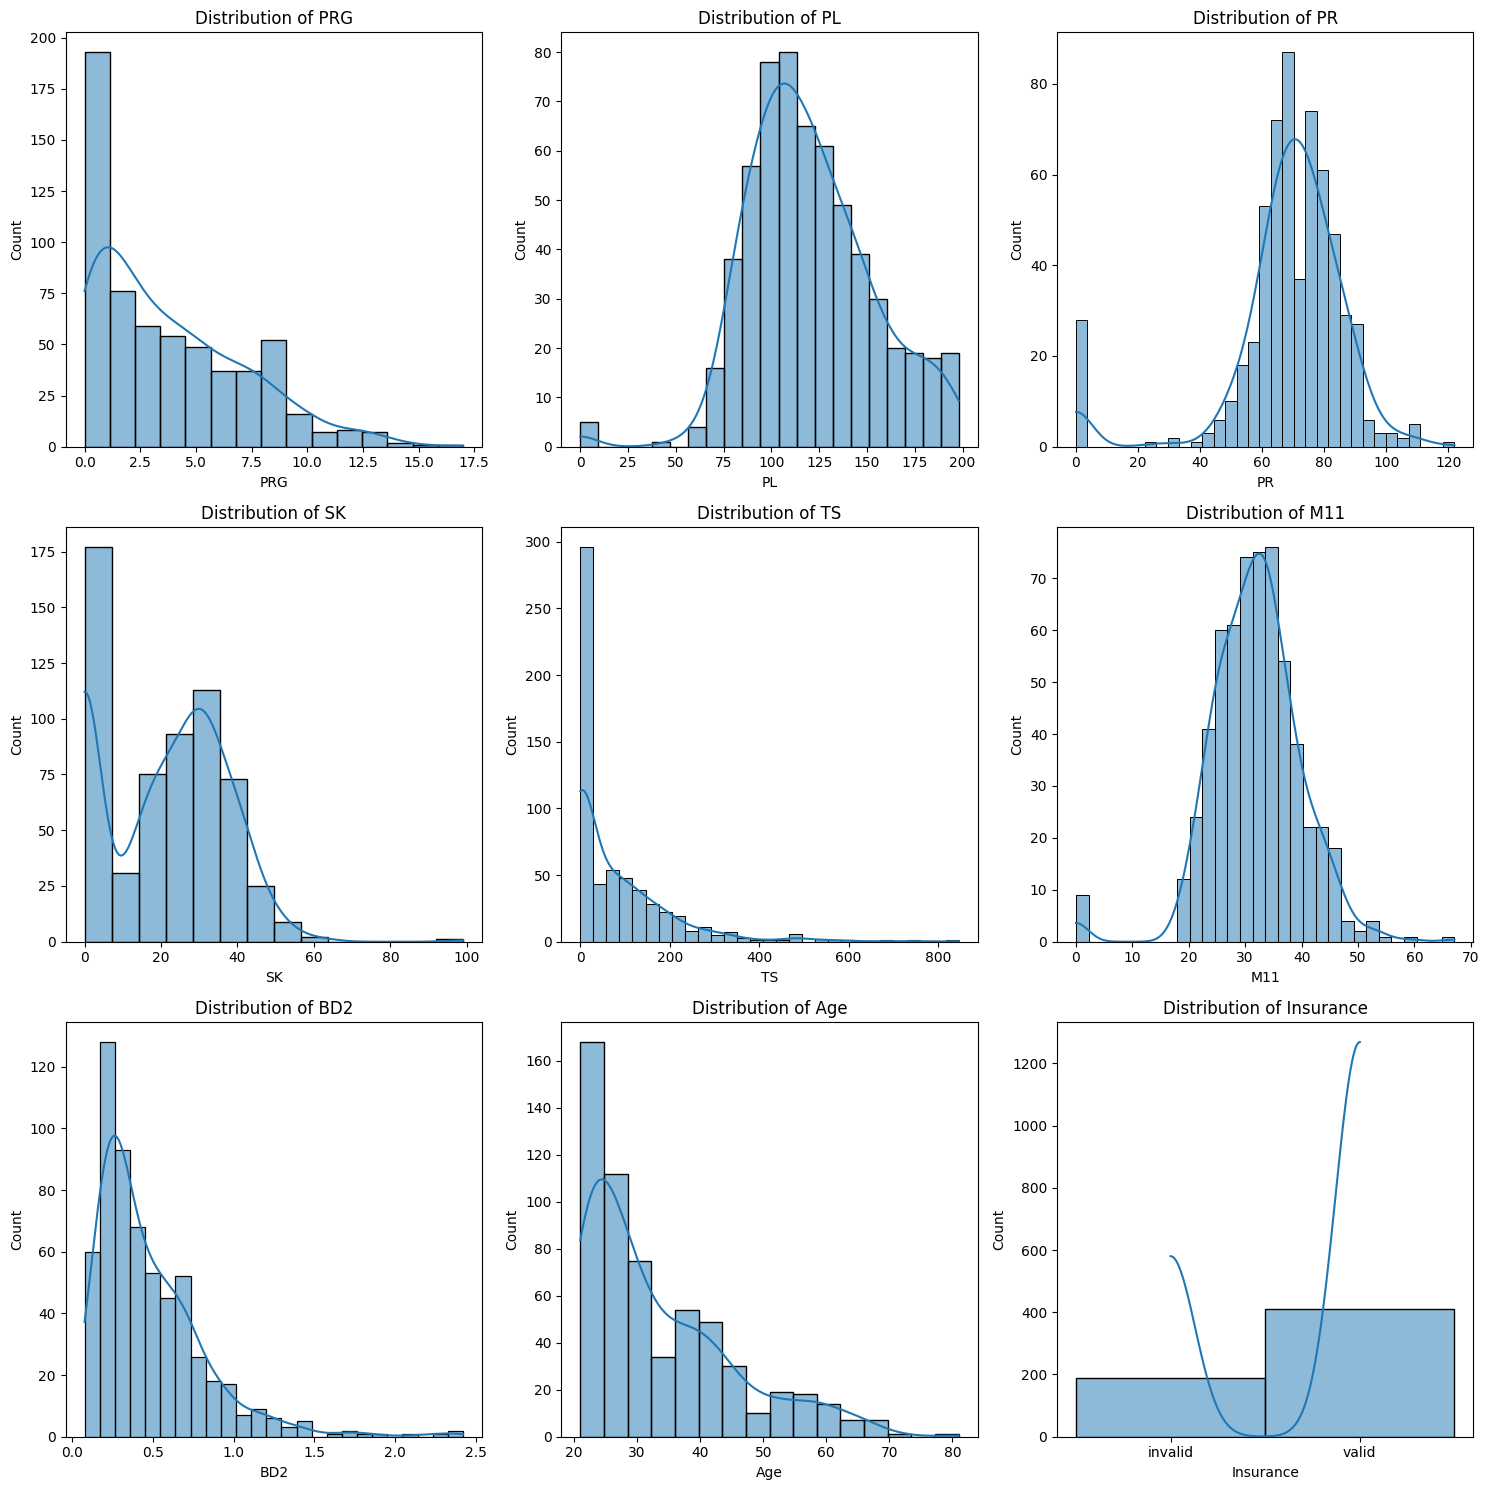

In [13]:
# Univariate Analysis
def univariate_analysis(df):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns[1:10]):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

univariate_analysis(df)

### Exploration of Categorical Features

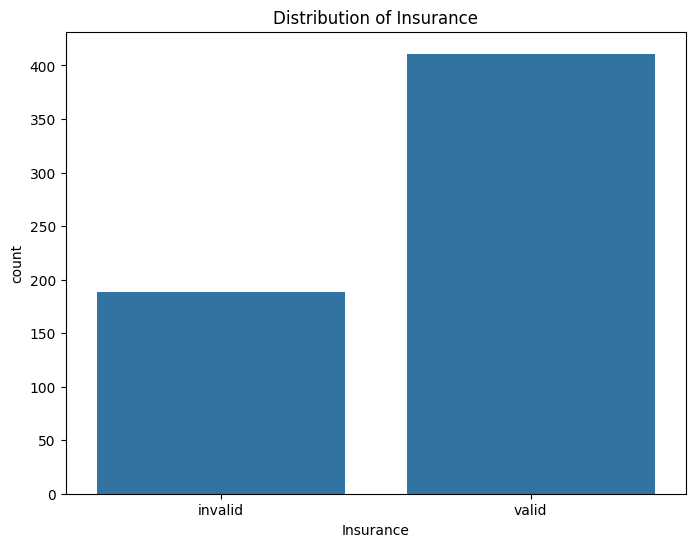

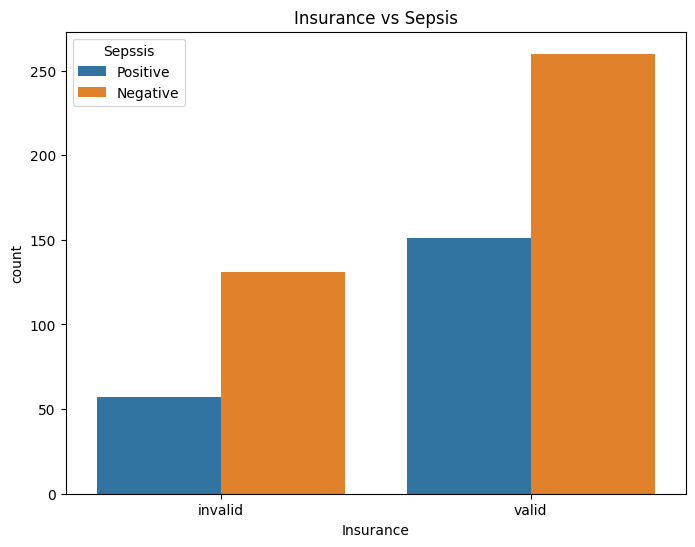

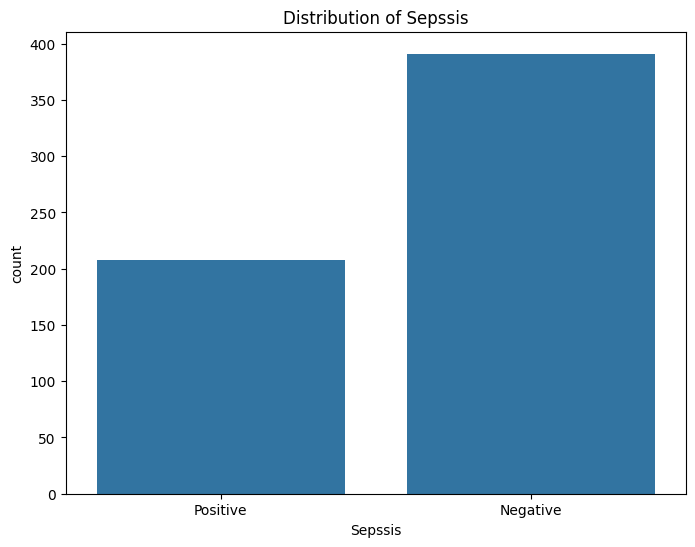

In [14]:
# Exploration of Categorical Features
def explore_categorical_features(df):
    categorical_cols = ['Insurance', 'Sepssis']

    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.show()
        
        if col != 'Sepssis':
            plt.figure(figsize=(8, 6))
            sns.countplot(x=col, hue='Sepssis', data=df)
            plt.title(f'{col} vs Sepsis')
            plt.show()

explore_categorical_features(df)



### Biveriate Analysis

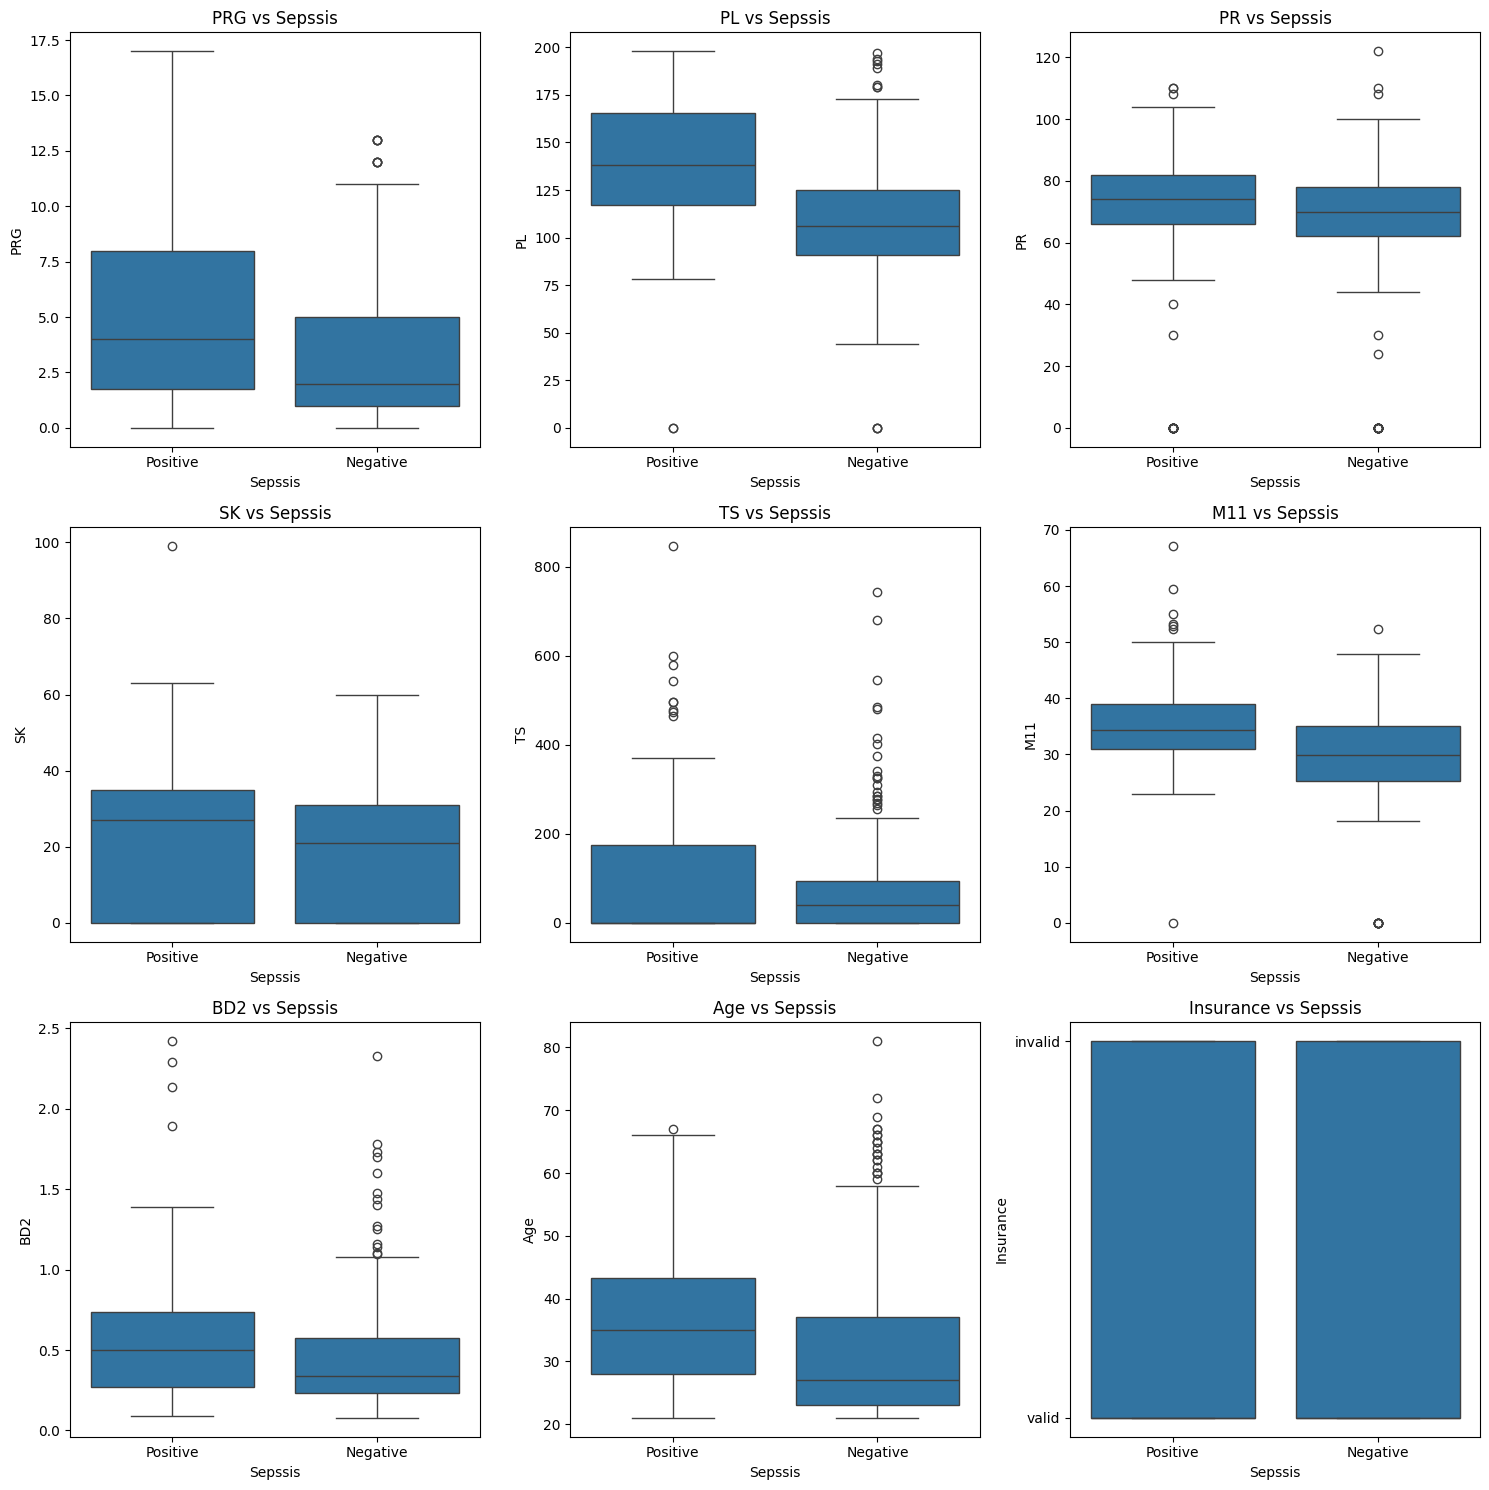

In [15]:
# Bivariate Analysis
def bivariate_analysis(df):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns[1:10]):
        if col != 'Sepssis':
            sns.boxplot(x='Sepssis', y=col, data=df, ax=axes[i])
            axes[i].set_title(f'{col} vs Sepssis')
    
    plt.tight_layout()
    plt.show()

bivariate_analysis(df)

### Multiveriate Analysis

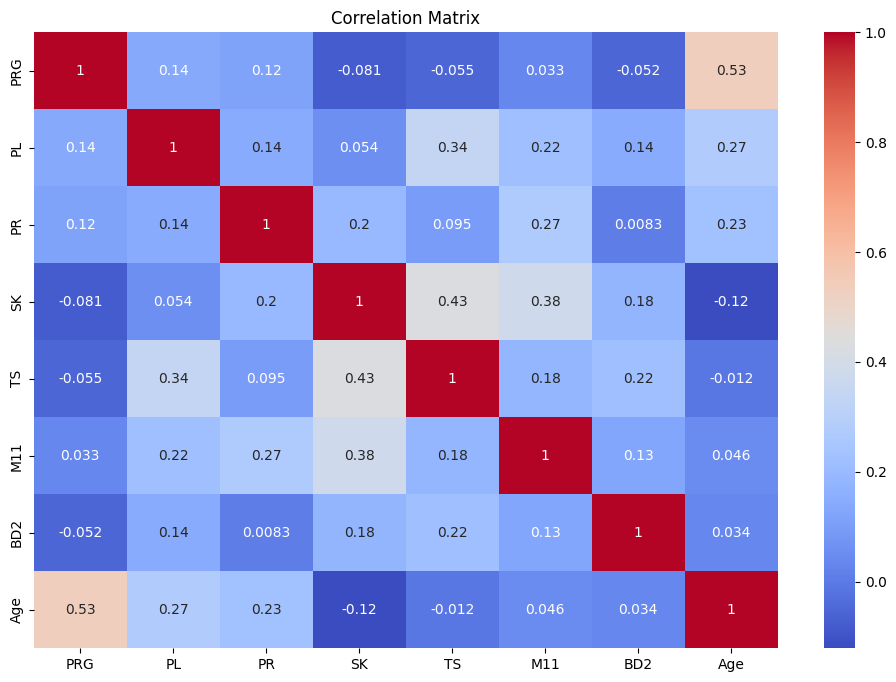

In [16]:
# Multivariate Analysis
def multivariate_analysis(df):
    numeric_df = df.drop(columns=['ID', 'Insurance','Sepssis'])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

multivariate_analysis(df)



### Age and sepssis pairplots

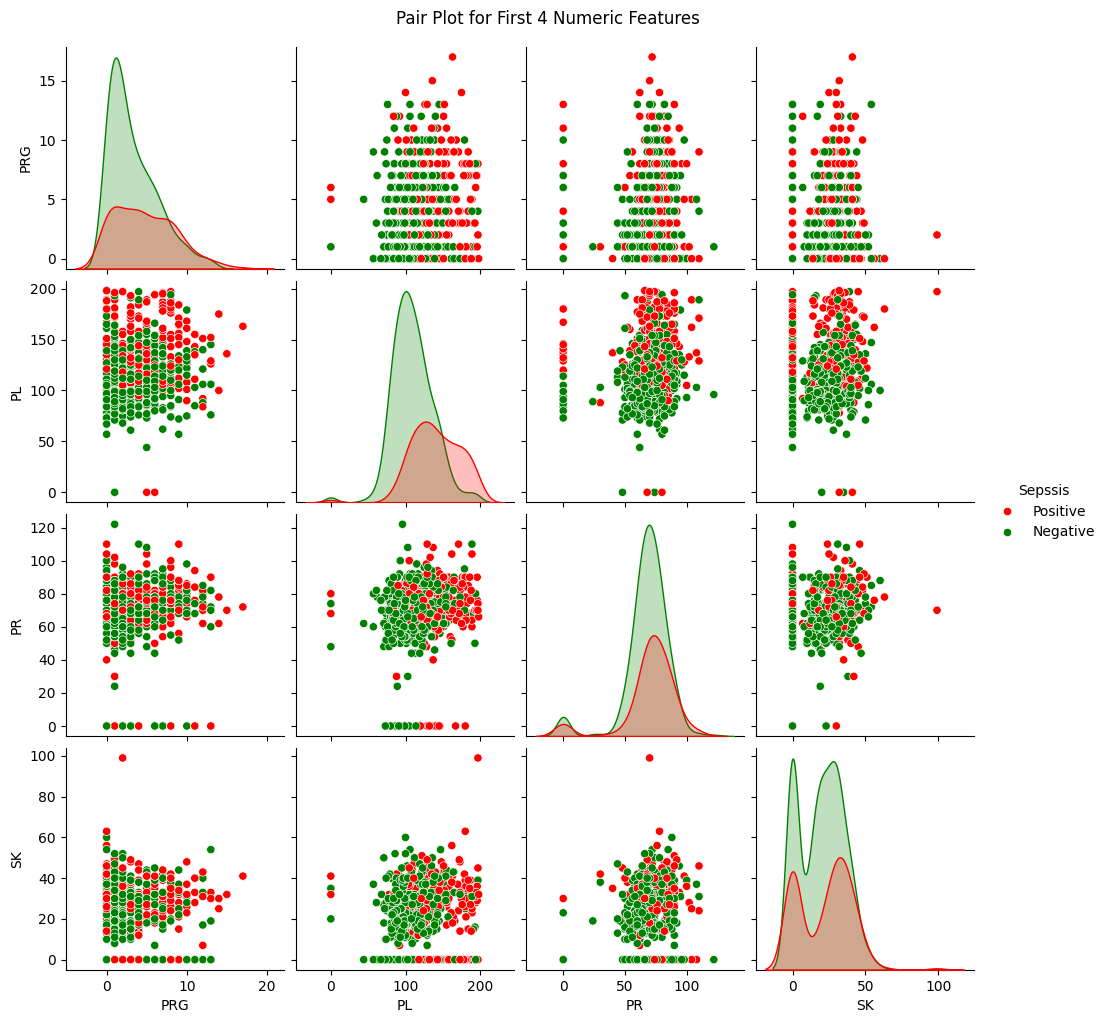

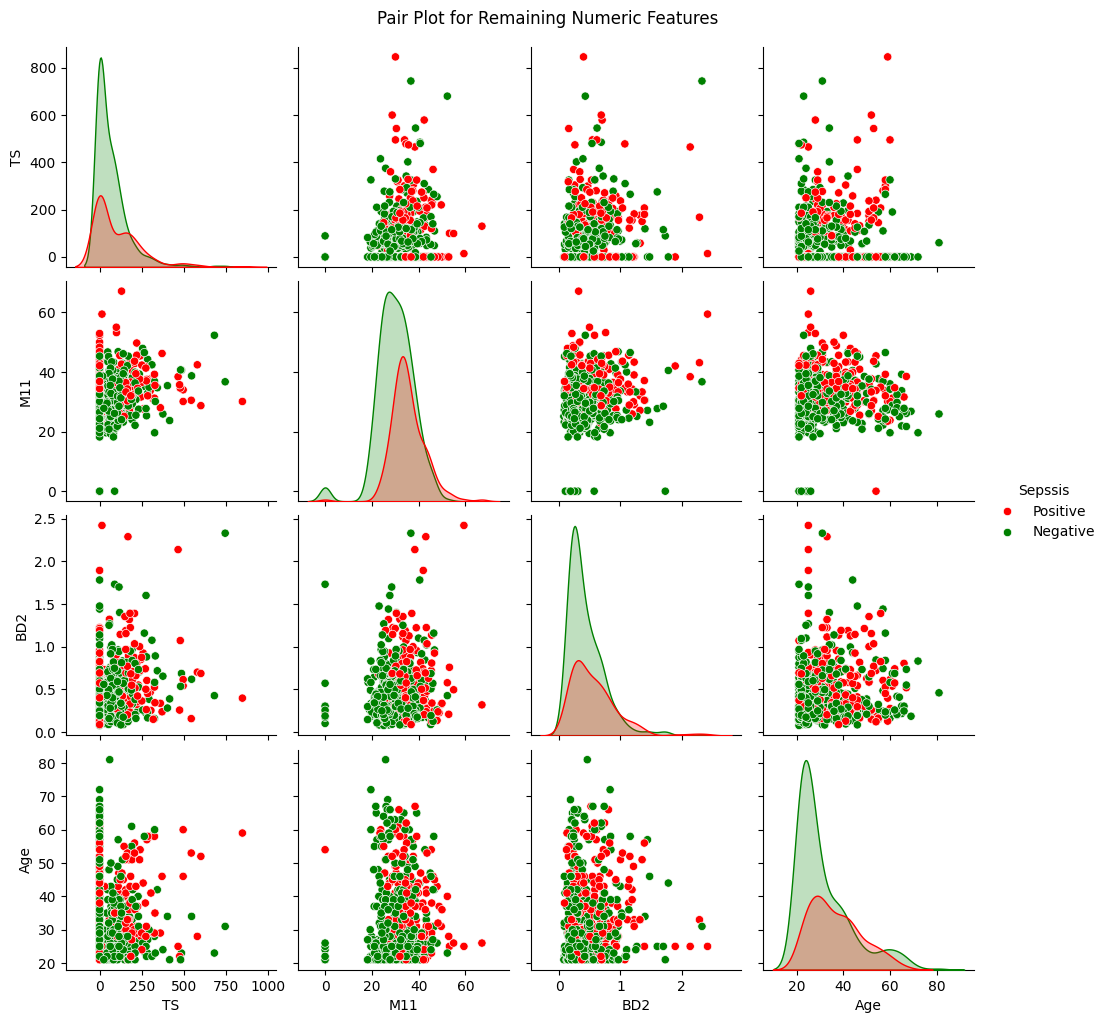

In [17]:


# Set up custom palette
palette = {'Positive': 'red', 'Negative': 'green'}

# Generate the pair plot for the first 4 numeric features
sns.pairplot(df, vars=['PRG', 'PL', 'PR', 'SK'], hue='Sepssis', palette=palette)
plt.suptitle('Pair Plot for First 4 Numeric Features', y=1.02)
plt.show()

# Generate the pair plot for the remaining numeric features
sns.pairplot(df, vars=['TS', 'M11', 'BD2', 'Age'], hue='Sepssis', palette=palette)
plt.suptitle('Pair Plot for Remaining Numeric Features', y=1.02)
plt.show()


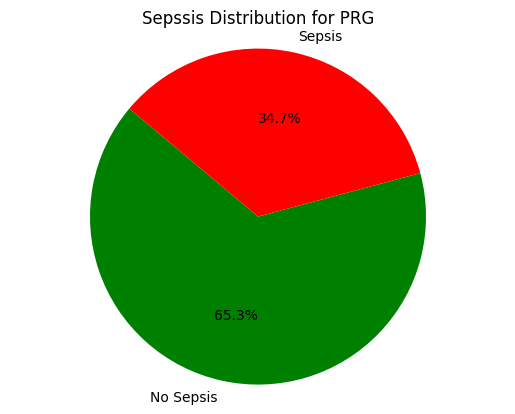

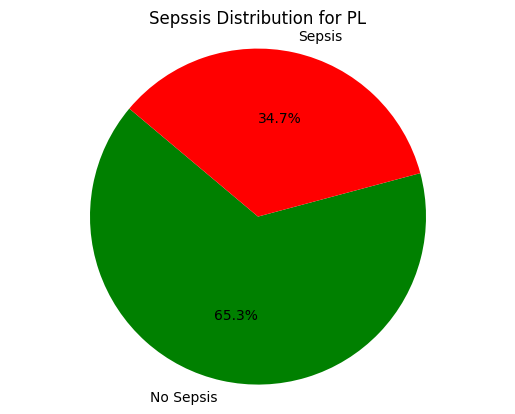

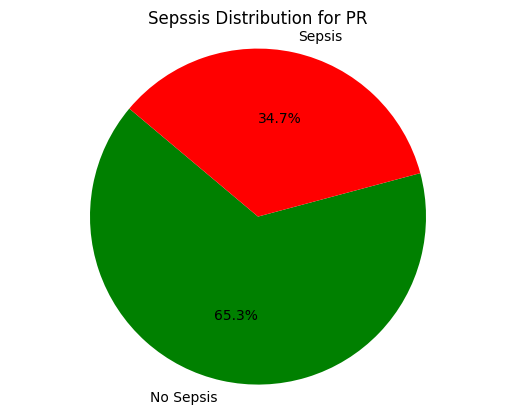

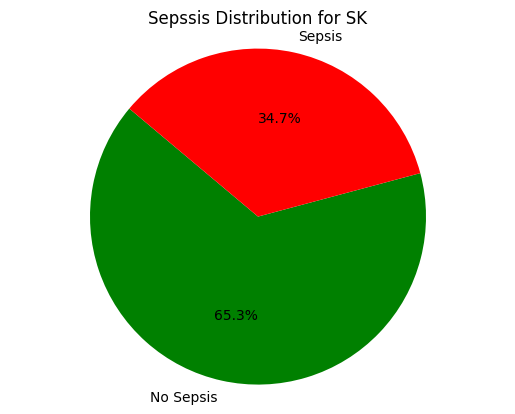

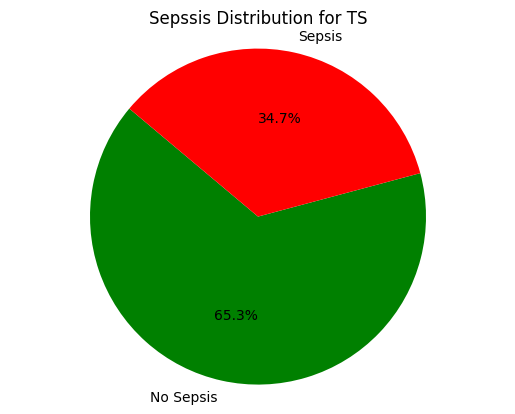

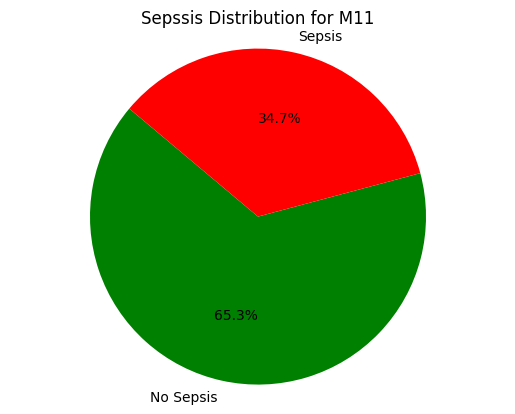

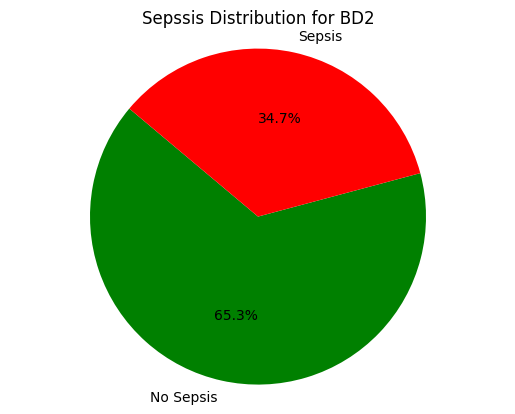

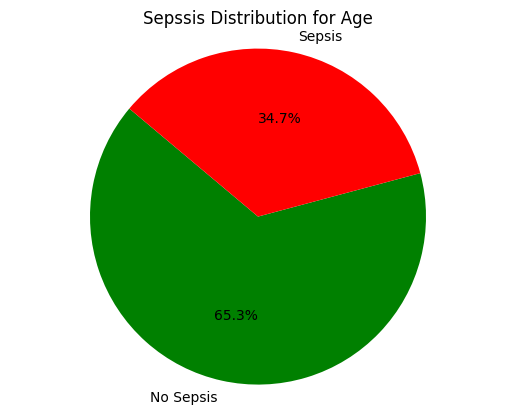

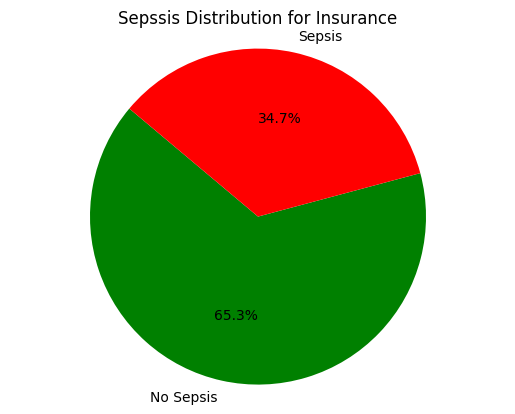

In [18]:

# Function to plot pie charts
def plot_pie_chart(feature):
    sepsis_counts = df.groupby(['Sepssis'])[feature].count()
    labels = ['No Sepsis', 'Sepsis']
    colors = ['green', 'red']
    plt.pie(sepsis_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sepssis Distribution for {feature}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()

# List of features to plot
features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

# Plot pie charts for each feature
for feature in features:
    plot_pie_chart(feature)
    

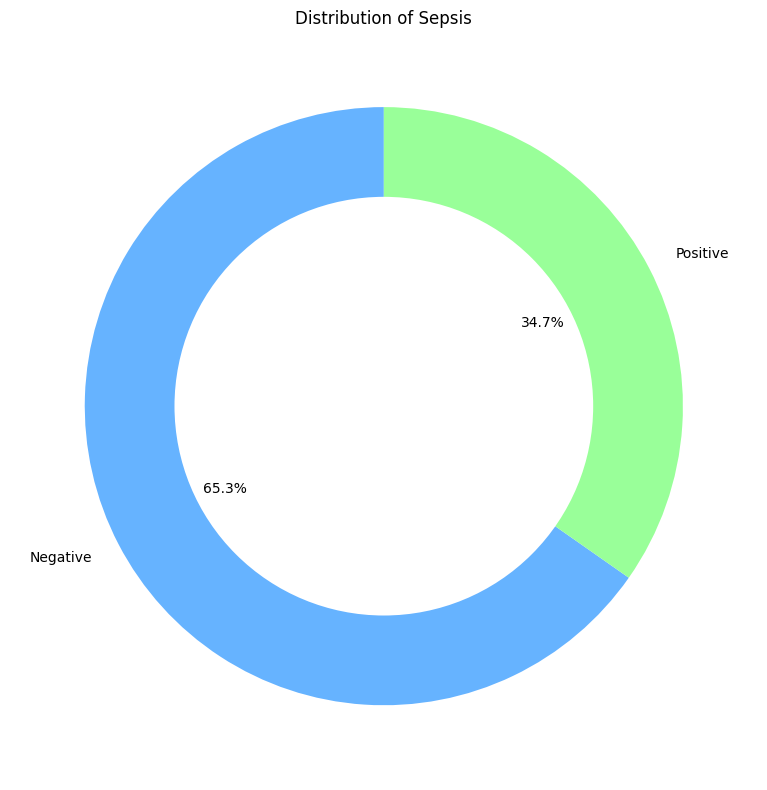

In [19]:


# Calculate value counts for Sepsis
sepsis_counts = df['Sepssis'].value_counts()

# Plotting the doughnut chart
plt.figure(figsize=(8, 8))
plt.pie(sepsis_counts, labels=sepsis_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
# Draw a circle at the center of pie to make it look like a doughnut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Sepsis')
plt.tight_layout()
plt.show()


## Hypothesis Testing and Answering Key Analytical Questions

### Hypothesis Testing

Null Hypothesis (H0): There is no significant association between the patient's age and the likelihood of sepsis.

Alternative Hypothesis (H1): There is a significant association between the patient's age and the likelihood of sepsis.

In [22]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,invalid,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,invalid,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,valid,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,valid,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,valid,Positive


In [25]:

from scipy.stats import chi2_contingency



# Categorize ages into bins
age_bins = [0, 20, 40, 60, np.inf]
age_labels = ['0-20', '21-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a contingency table of Age vs. Sepsis
contingency_table = pd.crosstab(df['AgeGroup'], df['Sepssis'])

# Perform the Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p < alpha:
    print("Reject the null hypothesis")
    print("There is a significant association between age and sepsis.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant association between age and sepsis.")

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Reject the null hypothesis
There is a significant association between age and sepsis.
Chi-Square Statistic: 30.063054308926347
P-value: 2.9640853320060214e-07


The Chi-Square test results indicate that we should reject the null hypothesis, as the p-value (approximately 2.46e-07) is significantly smaller than the chosen significance level (alpha) of 0.05. This means that there is a statistically significant association between a patient's age (in different age groups) and the likelihood of sepsis.

### Answering Key Analytical Questions
To address our key analytical objectives, we will focus on examining the interrelationships between various variables. We will utilize the Pearson Correlation coefficient, a foundational tool for quantifying the strength and direction of linear associations among these variables. Additionally, a correlation matrix will be constructed to provide a structured representation of these correlations. This matrix will offer a comprehensive view of how different medical parameters are interconnected. These critical insights, obtained from the Pearson Correlation coefficient and the correlation matrix, will empower us to discern the factors that will significantly influence the risk of sepsis.

i. Are there any correlations or patterns between the numerical features (e.g., PRG, PL, PR, SK, TS, M11, BD2, Age) and the presence of sepsis (Positive/Negative)?


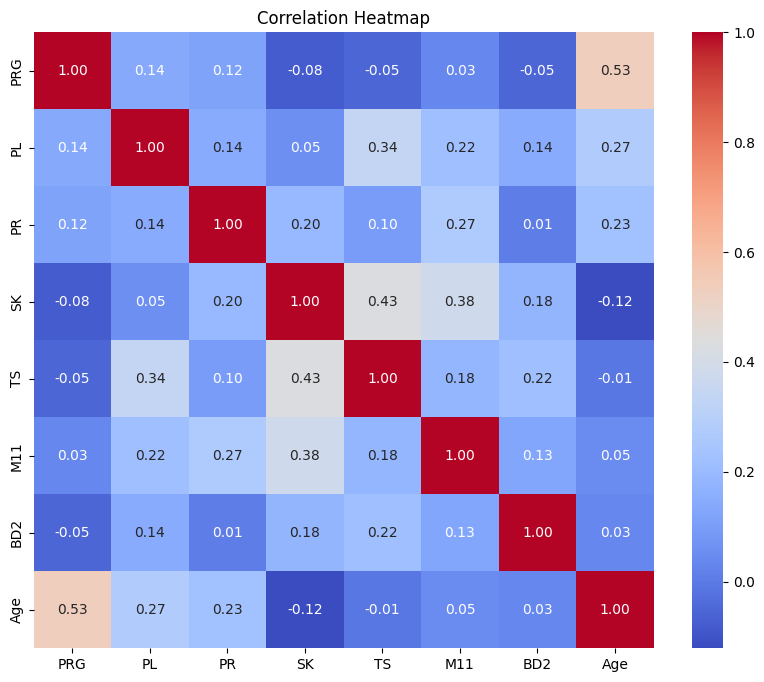

In [26]:
# Calculate the correlation matrix
corr_matrix = df[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Age and Number of Pregnancies (PRG): There is a moderately positive correlation (0.53) between the number of pregnancies (PRG) and age. This suggests that, on average, older individuals tend to have more pregnancies.

Plasma Glucose (PL) and 2-Hour Serum Insulin (TS): Plasma glucose (PL) and 2-hour serum insulin (TS) exhibit a moderate positive correlation (0.34). This correlation indicates that higher plasma glucose levels are associated with higher 2-hour serum insulin levels.

Plasma Glucose (PL) and Diastolic Blood Pressure (PR): There is a positive correlation (0.14) between plasma glucose (PL) and diastolic blood pressure (PR). This suggests that higher plasma glucose levels may be associated with higher diastolic blood pressure.

Skinfold Thickness (SK) and 2-Hour Serum Insulin (TS): Skinfold thickness (SK) and 2-hour serum insulin (TS) have a relatively strong positive correlation (0.43). This implies that individuals with higher skinfold thickness may tend to have higher 2-hour serum insulin levels.

Age and Skinfold Thickness (SK): There is a negative correlation (-0.12) between age and skinfold thickness (SK). This suggests that, on average, older individuals may have lower skinfold thickness.

Pregnancies (PRG) and Diastolic Blood Pressure (PR): The correlation between the number of pregnancies (PRG) and diastolic blood pressure (PR) is relatively low (0.12), indicating a weak positive relationship.

Age and Diabetes Pedigree Function (BD2): Age and the diabetes pedigree function (BD2) have a weak positive correlation (0.05), suggesting that age and the diabetes pedigree function are somewhat related, but the relationship is not strong.

ii. How does the distribution of key numerical variables (e.g., PR, SK, TS, M11) differ between patients with and without sepsis?

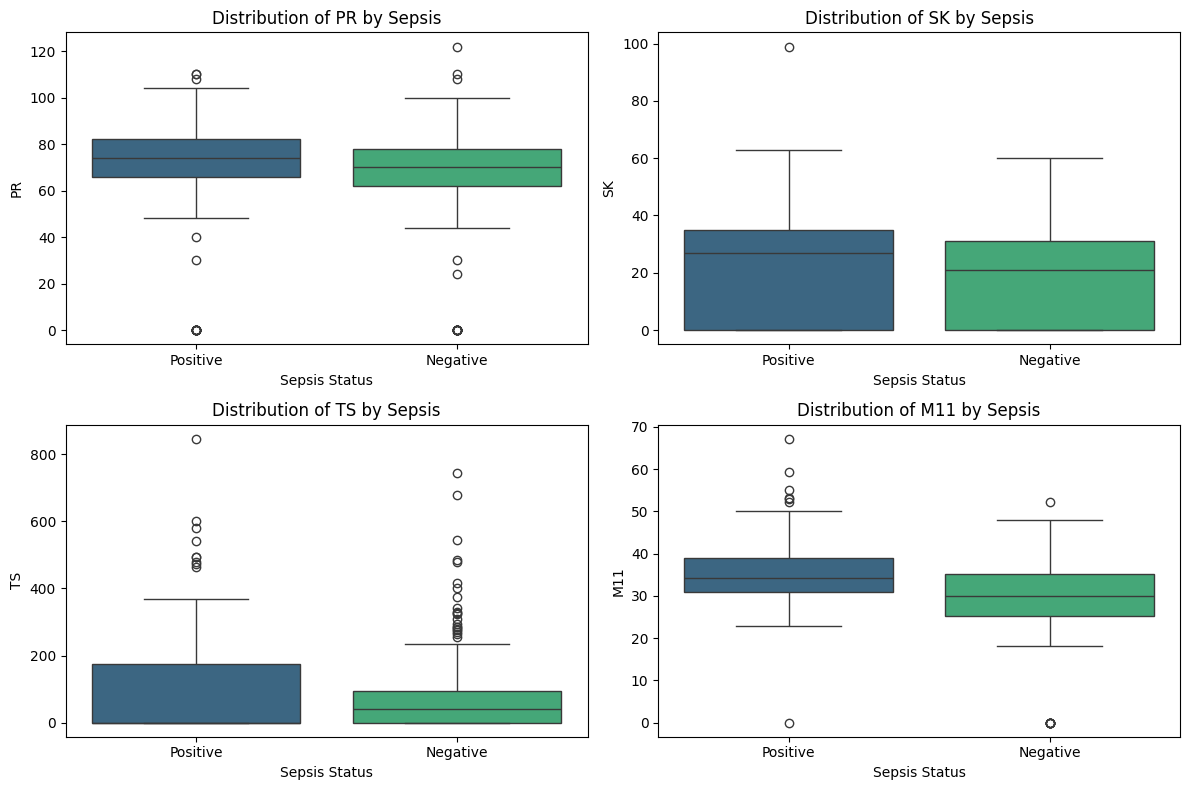

In [28]:
# Create subplots for each numerical variable
plt.figure(figsize=(12, 8))

# Define the numerical variables of interest
numerical_variables = ['PR', 'SK', 'TS', 'M11']

# Define the color palette with green and blue from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=2)

# Loop through the numerical variables and create subplots
for i, variable in enumerate(numerical_variables):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Sepssis', y=variable, data=df, hue='Sepssis', palette=colors)
    plt.title(f'Distribution of {variable} by Sepsis')
    plt.xlabel('Sepsis Status')
    plt.ylabel(variable)
    
plt.tight_layout()
plt.show()


The boxplots reveal that patients with sepsis generally have higher PR, SK, TS and M11 compared to patients without Sepsis. These differences suggest that PR, SK, TS, and BMI might be relevant factors in assessing the risk of sepsis.

iii. Is there a relationship between the number of pregnancies (PRG) and plasma glucose concentration (PL)? Does this relationship vary with the presence of sepsis?

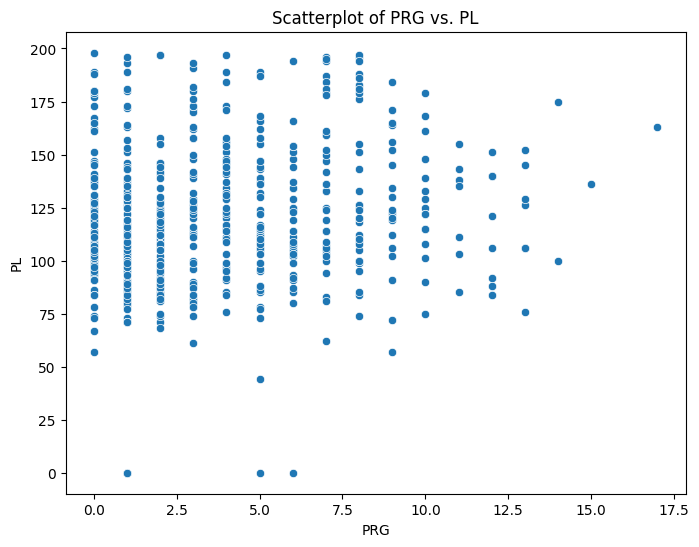

Pearson Correlation between 'PRG' and 'PL': 0.13954104835183154


In [30]:
# Select the columns of interest
scatter_data = df[['PRG', 'PL']]

# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRG', y='PL', data=scatter_data)
plt.title('Scatterplot of PRG vs. PL')
plt.xlabel('PRG')
plt.ylabel('PL')
plt.show()

# Calculate Pearson correlation
s0 = scatter_data['PRG']
s1 = scatter_data['PL']
pearson = s0.corr(s1, method='pearson')

# Print the correlation values
print(f"Pearson Correlation between 'PRG' and 'PL': {pearson}")

The Pearson correlation indicate a weak positive relationship between 'PRG' and 'PL.' While the Pearson correlation measures linear association and Spearman is non-parametric, they provide consistent results in this case, suggesting that as 'PRG' values increase, 'PL' values tend to increase, but the relationship is not particularly strong. These results are corroborated by the correlation matrix.

iv. Are there any significant differences in diastolic blood pressure (PR) between patients with different triceps skinfold thickness (SK) levels?

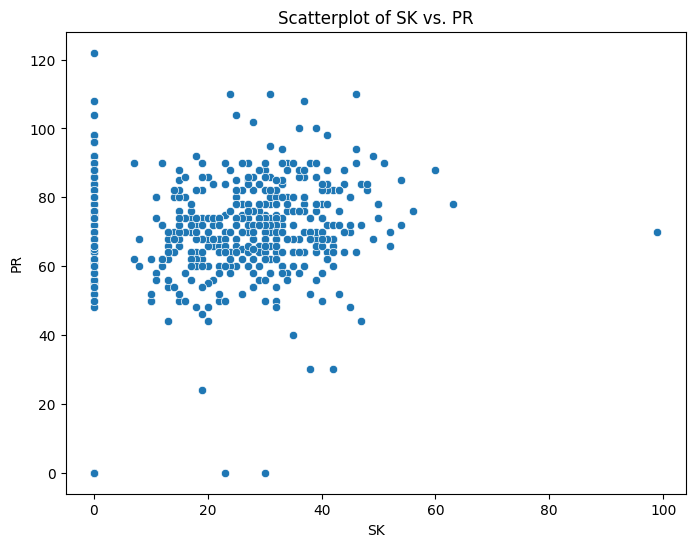

Pearson Correlation between 'PR' and 'SK': 0.1975352882024966


In [31]:
# Select the columns of interest
scatter_data = df[['PR', 'SK']]

# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SK', y='PR', data=scatter_data)
plt.title('Scatterplot of SK vs. PR')
plt.xlabel('SK')
plt.ylabel('PR')
plt.show()

# Calculate Pearson correlation
s0 = scatter_data['PR']
s1 = scatter_data['SK']
pearson = s0.corr(s1, method='pearson')

# Print the correlation values
print(f"Pearson Correlation between 'PR' and 'SK': {pearson}")

Pearson Correlation between 'PR' and 'SK': 0.1975352882024966
The analysis indicates a modest positive relationship (Pearson correlation coefficient of approximately 0.198) between diastolic blood pressure (PR) and triceps skinfold thickness (SK). This suggests that as triceps skinfold thickness increases, diastolic blood pressure tends to rise slightly. Such a correlation may have potential implications for cardiovascular health, as higher triceps skinfold thickness often reflects increased subcutaneous fat. However, it's essential to recognize that the correlation is not notably strong, and its clinical significance would require further investigation and the consideration of additional health factors to draw comprehensive conclusions about the potential impact on individuals' health and well-being.

v. Does the body mass index (M11) vary significantly with 2-hour serum insulin (TS) levels?

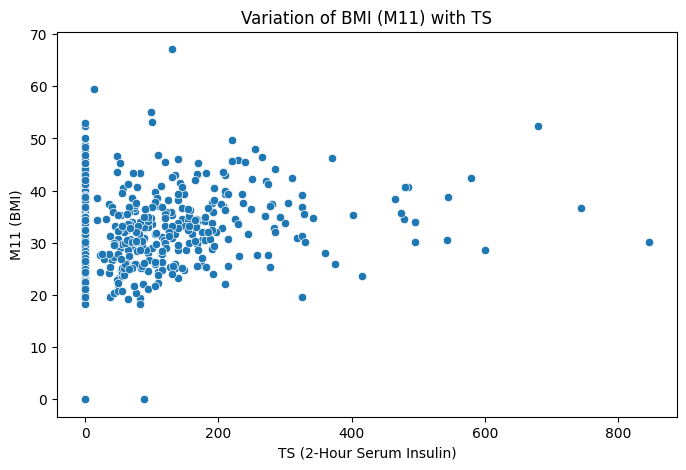

Pearson Correlation between TS and M11: 0.18474687309420654


In [33]:
# Scatterplot of M11 (BMI) vs. TS
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TS', y='M11')
plt.xlabel('TS (2-Hour Serum Insulin)')
plt.ylabel('M11 (BMI)')
plt.title('Variation of BMI (M11) with TS')
plt.show()

# Calculate Pearson correlation
s0 = df['TS']  
s1 = df['M11']  
pearson = s0.corr(s1, method='pearson')

# Print the correlation values
print(f"Pearson Correlation between TS and M11: {pearson}")


The Pearson Correlation between 'TS' (2-Hour Serum Insulin) and 'M11' (BMI) is approximately 0.185. This indicates a weak positive linear correlation between these two variables. The correlation of 0.185 suggests that as 2-Hour Serum Insulin levels ('TS') increase, there is a slight tendency for BMI ('M11') to also increase, but the relationship is not notably strong. It's important to note that correlation does not imply causation, so while there is an association, it doesn't necessarily mean that changes in 2-Hour Serum Insulin directly cause changes in BMI.

vi. Is there a correlation between the diabetes pedigree function (BD2) and age? How does this correlation affect the likelihood of sepsis?

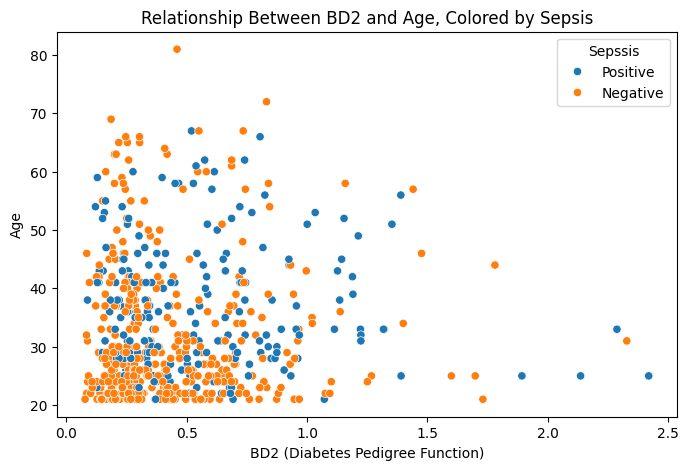

Pearson Correlation between BD2 and Age: 0.03356672354105742


In [35]:
# Create a scatterplot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='BD2', y='Age', hue='Sepssis')
plt.xlabel('BD2 (Diabetes Pedigree Function)')
plt.ylabel('Age')
plt.title('Relationship Between BD2 and Age, Colored by Sepsis')
plt.show()

# Calculate Pearson correlation between BD2 and age
pearson_correlation = df['BD2'].corr(df['Age'], method='pearson')

# Print the Pearson correlation value
print(f"Pearson Correlation between BD2 and Age: {pearson_correlation}")

The Pearson Correlation between the diabetes pedigree function (BD2), a measure of genetic diabetes susceptibility, and age is extremely weak at approximately 0.0336. This weak correlation suggests that age has minimal influence on BD2. Consequently, when considering sepsis risk solely in terms of age and its correlation with BD2, it is unlikely that age significantly affects the likelihood of sepsis based on BD2. In this specific context, the focus is on the limited relationship between age and BD2, indicating that age alone may not be a reliable predictor for sepsis risk associated with BD2. Other factors may play a more substantial role in determining sepsis risk.

vii. Are patients with insurance coverage more likely to have certain health characteristics (e.g., higher age, higher BMI) compared to those without insurance coverage?

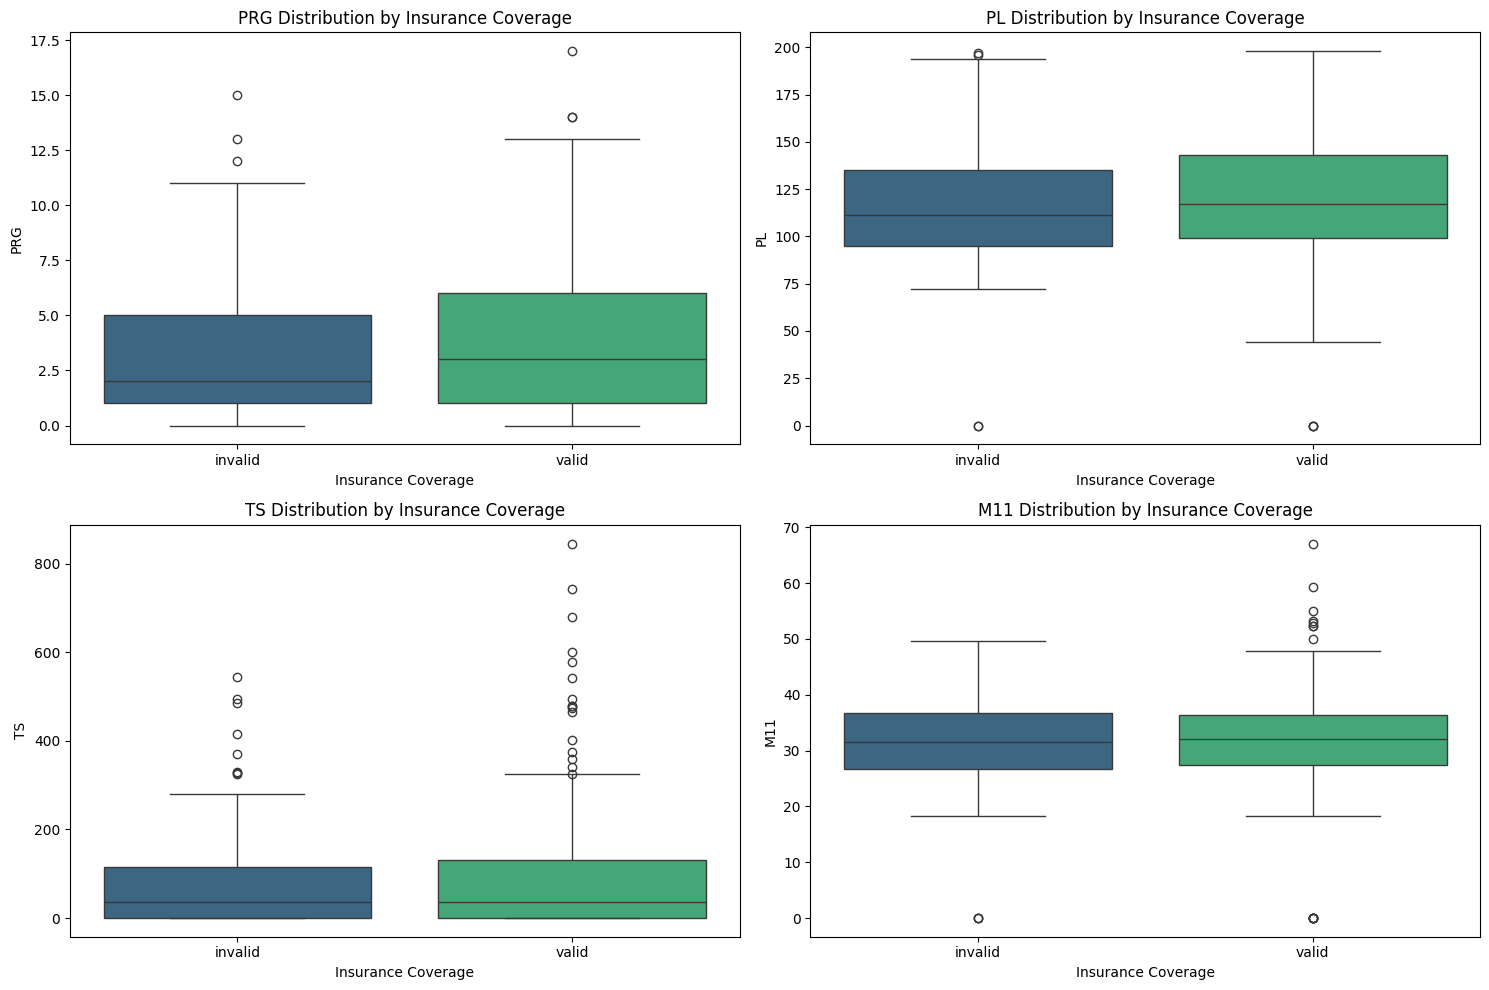

,Insurance,Mean PRG,Mean PL,Mean TS,Mean M11
0,invalid,3.404255,117.691489,72.303191,31.602660
1,valid,4.017032,121.279805,82.734793,32.065207


In [36]:
# Numeric variables to compare
numeric_variables = ['PRG', 'PL', 'TS', 'M11']

# Create subplots for each numeric variable
plt.figure(figsize=(15, 10))
colors = sns.color_palette('viridis', n_colors=2)

for i, variable in enumerate(numeric_variables):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x='Insurance', y=variable, palette=colors)
    plt.xlabel('Insurance Coverage')
    plt.ylabel(variable)
    plt.title(f'{variable} Distribution by Insurance Coverage')

plt.tight_layout()
plt.show()

# Calculate the mean for each numeric variable based on Insurance (0, 1)
mean_numeric_vs_insurance = df.groupby('Insurance')[numeric_variables].mean().reset_index()
mean_numeric_vs_insurance.columns = ['Insurance'] + [f'Mean {var}' for var in numeric_variables]

# Display the DataFrame
mean_numeric_vs_insurance

The boxplots and mean values based on insurance coverage provide valuable insights into the relationship between insurance status and various health characteristics. Here are detailed insights for each of the numeric variables:

Mean PRG (Number of Pregnancies): Patients with insurance coverage (Insurance=1) exhibit a slightly higher mean number of pregnancies (approximately 4.02) compared to patients without insurance (Insurance=0) with a mean of approximately 3.40. This suggests that individuals with insurance might be more likely to have a slightly higher number of pregnancies.

Mean PL (Plasma Glucose): Patients with insurance coverage tend to have a slightly higher mean plasma glucose level (approximately 121.28) compared to patients without insurance (mean of approximately 117.69). This implies that individuals with insurance coverage may be more likely to have a slightly elevated plasma glucose level.

Mean TS (2-Hour Serum Insulin): Patients with insurance coverage exhibit a notably higher mean 2-hour serum insulin level (approximately 82.73) in comparison to patients without insurance (mean of approximately 72.30). This suggests that individuals with insurance are more likely to have a higher 2-hour serum insulin level.

Mean M11 (BMI - Body Mass Index): Patients with insurance coverage also demonstrate a slightly higher mean BMI (approximately 32.07) when compared to patients without insurance (mean of approximately 31.60). This implies that individuals with insurance may be more likely to have a slightly higher BMI.

These insights collectively indicate that patients with insurance coverage may have certain health characteristics, such as higher numbers of pregnancies, elevated plasma glucose levels, higher 2-hour serum insulin levels, and slightly higher BMI.

## Data preparation

### Handle missing values

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    object 
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 51.6+ KB


In [105]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,invalid,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,invalid,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,valid,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,valid,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,valid,Positive


In [106]:
train_df = df.copy()

In [107]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,invalid,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,invalid,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,valid,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,valid,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,valid,Positive


In [108]:
train_df.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,invalid,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,invalid,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,valid,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,valid,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,valid,Positive


In [109]:
train_df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### Key Insights
1. No Missing values
2. All features apart from ID are positivelive correlated to Sepsis 
3. Data is imbalanced
3. All features apart from ID are valid for sepsis prediction models



In [110]:
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,invalid,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,invalid,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,valid,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,valid,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,valid,Positive


In [111]:
# Assuming train_df is your DataFrame containing the 'Insurance' column
train_df['Insurance'] = train_df['Insurance'].map({'valid': 1, 'invalid': 0})


In [112]:
train_df = train_df.drop(columns=['ID'])

In [113]:
train_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


#### Split Data into Training and Evaluation sets

In [114]:
# Assign the dataset to X and y variables. y being the target variable and X being the features (input)
X = train_df.drop('Sepssis', axis=1)
y = train_df['Sepssis']

In [115]:
#Split X and y dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [116]:
# Define numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [117]:
num_cols

['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

In [118]:
cat_cols

[]

In [119]:
# Use label encoder to encode the target variables into 1(Yes) and 0(No)
encoder = LabelEncoder()

In [120]:
#Fit transforn the y train (Fit_transform instructs the model to learn and transform)
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [122]:


# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('num_scaler', MinMaxScaler())  # Scale features to a range
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('cat_encoder', LabelEncoder())  # Encode categorical variables
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

### Models with pipelines

In [123]:

# List of models with pipelines
models = [
    ('Logistic_regression', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', LogisticRegression(random_state=42))
    ])),
    ('Decision_tree', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])),
    ('Random_forest', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])),
    ('Support_vector', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', SVC(random_state=42, probability=True))  # Enable probability estimates for AUC
    ])),
    ('KNN', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ])),
    ('Gradient_boost', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])),
]

In [124]:









# Create dictionaries to store pipelines and confusion matrices
all_pipelines = {}
all_confusion_matrix = {}

# DataFrame to store metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'auc'])

# Assuming y_train_encoded, y_test_encoded are already defined from LabelEncoder
# Create and evaluate pipelines
for model_name, classifier in models:
    final_pipeline = classifier

    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train)

    # Store the pipeline in the dictionary
    all_pipelines[model_name] = final_pipeline

    # Predict on the test set
    y_pred = final_pipeline.predict(X_test)
    
    # Predict probabilities for AUC calculation (only works for classifiers with probability=True)
    if hasattr(final_pipeline['classifier'], 'predict_proba'):
        y_prob = final_pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = None
    
    # Calculate AUC if probabilities are available
    if y_prob is not None:
        auc_score = roc_auc_score(y_test, y_prob)
    else:
        auc_score = None

    # Generate classification report
    metrics = classification_report(y_test, y_pred, output_dict=True)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    all_confusion_matrix[model_name] = conf_matrix

    # Extract metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    # Append metrics to the DataFrame using pd.concat
    metrics_table = pd.concat([metrics_table, pd.DataFrame([{
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'auc': auc_score
    }])], ignore_index=True)

# Display metrics for all models in descending order of f1_score
metrics_table_sorted = metrics_table.sort_values(by='f1_score', ascending=False)
print(metrics_table_sorted)

            model_name  accuracy  precision    recall  f1_score       auc
3       Support_vector  0.750000   0.777190  0.750000  0.755333  0.839303
5       Gradient_boost  0.750000   0.752990  0.750000  0.751284  0.802198
0  Logistic_regression  0.744444   0.766124  0.744444  0.749464  0.822683
2        Random_forest  0.744444   0.748607  0.744444  0.746154  0.799959
1        Decision_tree  0.694444   0.700499  0.694444  0.696940  0.673382
4                  KNN  0.672222   0.697250  0.672222  0.678866  0.725207


In [125]:
all_pipelines

{'Logistic_regression': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('num_imputer',
                                                                    SimpleImputer()),
                                                                   ('num_scaler',
                                                                    MinMaxScaler())]),
                                                   ['PRG', 'PL', 'PR', 'SK',
                                                    'TS', 'M11', 'BD2', 'Age',
                                                    'Insurance']),
                                                  ('cat',
                                                   Pipeline(steps=[('cat_imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('cat_

### Visualize each pipeline

In [126]:
from sklearn import set_config

# Set the display option to plot the pipeline
set_config(display='diagram')

# Visualize each pipeline
for model_name, pipeline in all_pipelines.items():
    print(f"Pipeline for {model_name}:")
    display(pipeline)

Pipeline for Logistic_regression:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

Pipeline for Decision_tree:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

Pipeline for Random_forest:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

Pipeline for Support_vector:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', SVC(probability=True, random_state=42))])

Pipeline for KNN:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', KNeighborsClassifier())])

Pipeline for Gradient_boost:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

### Save Encoder

In [127]:
# Save the encoder to a file
encoder_filename = 'encoder.joblib'
joblib.dump(encoder, encoder_filename)
print(f"Encoder saved to '{encoder_filename}'")

Encoder saved to 'encoder.joblib'


### Fine Tuning Models

In [133]:


# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic_regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    'Decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Random_forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_features': ['auto', 'sqrt', 'log2'],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Support_vector': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Gradient_boost': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'classifier__max_depth': [3, 5, 7, 9],
        'classifier__subsample': [0.7, 0.8, 0.9, 1.0]
    }
}

# List of models with pipelines
models = [
    ('Logistic_regression', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', LogisticRegression(random_state=42))
    ])),
    ('Decision_tree', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])),
    ('Random_forest', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])),
    ('Support_vector', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', SVC(random_state=42, probability=True))  # Enable probability estimates for AUC
    ])),
    ('KNN', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ])),
    ('Gradient_boost', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])),
]

# Create dictionaries to store pipelines and confusion matrices
all_pipelines = {}
all_confusion_matrix = {}

# DataFrame to store metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'auc'])

# Directory to save pipelines
pipeline_directory = "trained_pipelines"
os.makedirs(pipeline_directory, exist_ok=True)

# Create and evaluate pipelines with hyperparameter tuning
for model_name, classifier in models:
    # Define RandomizedSearchCV
    random_search = RandomizedSearchCV(classifier, param_distributions=param_grids[model_name], 
                                       n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
    
    # Fit data to pipeline
    random_search.fit(X_train, y_train_encoded)
    
    # Get the best estimator
    best_pipeline = random_search.best_estimator_

    # Store the pipeline in the dictionary
    all_pipelines[model_name] = best_pipeline

    # Predict on the test set
    y_pred = best_pipeline.predict(X_test)
    
    # Predict probabilities for AUC calculation (only works for classifiers with probability=True)
    if hasattr(best_pipeline['classifier'], 'predict_proba'):
        y_prob = best_pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = None
    
    # Calculate AUC if probabilities are available
    if y_prob is not None:
        auc_score = roc_auc_score(y_test_encoded, y_prob)
    else:
        auc_score = None

    # Generate classification report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    all_confusion_matrix[model_name] = conf_matrix

    # Extract metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    # Append metrics to the DataFrame using pd.concat
    metrics_table = pd.concat([metrics_table, pd.DataFrame([{
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'auc': auc_score
    }])], ignore_index=True)
    
    # Save the pipeline for each model
    pipeline_filename = os.path.join(pipeline_directory, f"{model_name}_pipeline.joblib")
    dump(best_pipeline, pipeline_filename)
    print(f"{model_name} pipeline saved to {pipeline_filename}")

# Display metrics for all models in descending order of f1_score
metrics_table_sorted = metrics_table.sort_values(by='f1_score', ascending=False)
print(metrics_table_sorted)


Logistic_regression pipeline saved to trained_pipelines\Logistic_regression_pipeline.joblib
Decision_tree pipeline saved to trained_pipelines\Decision_tree_pipeline.joblib
Random_forest pipeline saved to trained_pipelines\Random_forest_pipeline.joblib
Support_vector pipeline saved to trained_pipelines\Support_vector_pipeline.joblib
KNN pipeline saved to trained_pipelines\KNN_pipeline.joblib
Gradient_boost pipeline saved to trained_pipelines\Gradient_boost_pipeline.joblib
            model_name  accuracy  precision    recall  f1_score       auc
3       Support_vector  0.750000   0.777190  0.750000  0.755333  0.839303
5       Gradient_boost  0.738889   0.749537  0.738889  0.742370  0.806675
2        Random_forest  0.738889   0.746818  0.738889  0.741734  0.803147
0  Logistic_regression  0.722222   0.751894  0.722222  0.728268  0.816578
1        Decision_tree  0.705556   0.716898  0.705556  0.709481  0.730973
4                  KNN  0.672222   0.708671  0.672222  0.679656  0.730566


In [129]:
# Create directory for saving models if it doesn't exist
models_directory = 'trained_models/'
if not os.path.exists(models_directory):
    os.makedirs(models_directory)

# Save each pipeline
for model_name, pipeline in all_pipelines.items():
    filename = models_directory + model_name + ".joblib"
    joblib.dump(pipeline, filename)
    print(f"Model '{model_name}' saved to '{filename}'")

Model 'Logistic_regression' saved to 'trained_models/Logistic_regression.joblib'
Model 'Decision_tree' saved to 'trained_models/Decision_tree.joblib'
Model 'Random_forest' saved to 'trained_models/Random_forest.joblib'
Model 'Support_vector' saved to 'trained_models/Support_vector.joblib'
Model 'KNN' saved to 'trained_models/KNN.joblib'
Model 'Gradient_boost' saved to 'trained_models/Gradient_boost.joblib'


In [130]:


# Define the directory to save the pipeline
pipeline_directory = "trained_pipeline/"

# Create the directory if it doesn't exist
os.makedirs(pipeline_directory, exist_ok=True)

# Save the entire pipeline
pipeline_filename = os.path.join(pipeline_directory, "full_pipeline.joblib")

# Assuming you have a pipeline object 'final_pipeline'

dump(final_pipeline, pipeline_filename)

print(f"Pipeline saved to {pipeline_filename}")


Pipeline saved to trained_pipeline/full_pipeline.joblib


### 1. Primary Medical Attributes Contributing to Sepsis Development

**Visualizations:**
- Use box plots, histograms, or violin plots to compare distributions of medical attributes (e.g., vital signs, lab results) between patients who develop sepsis and those who do not.

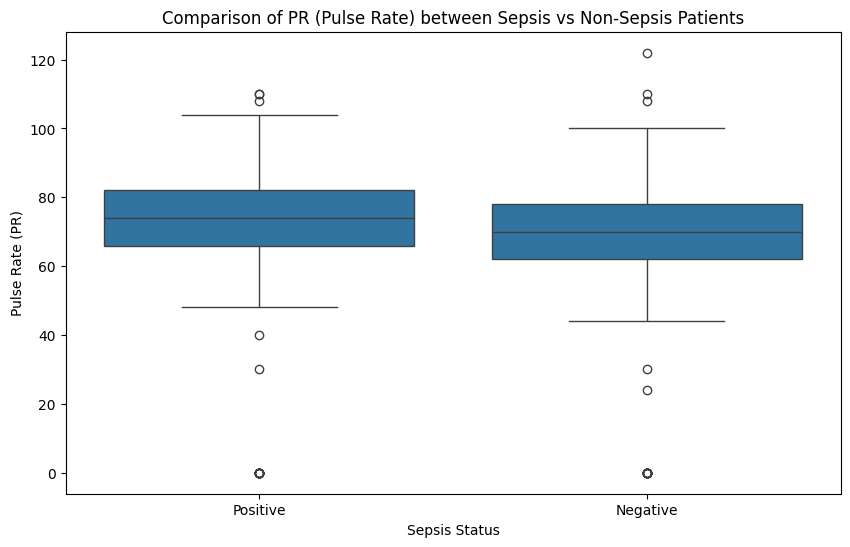

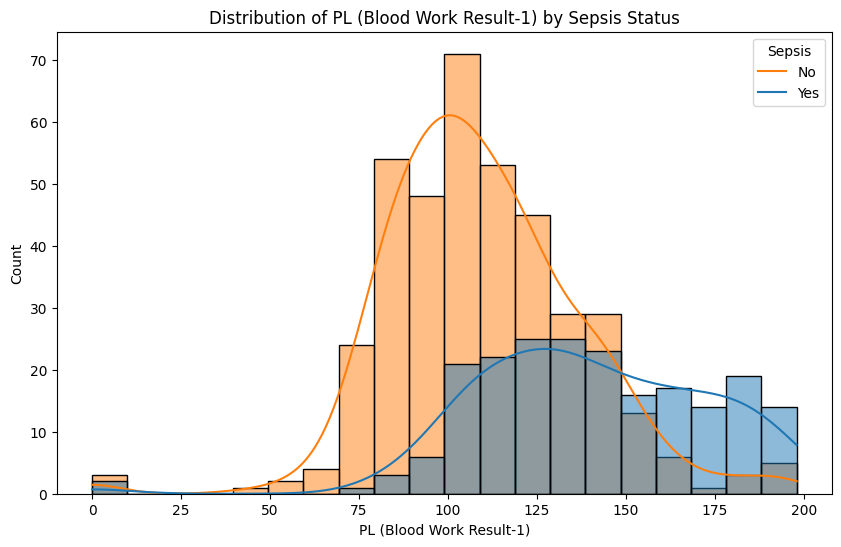

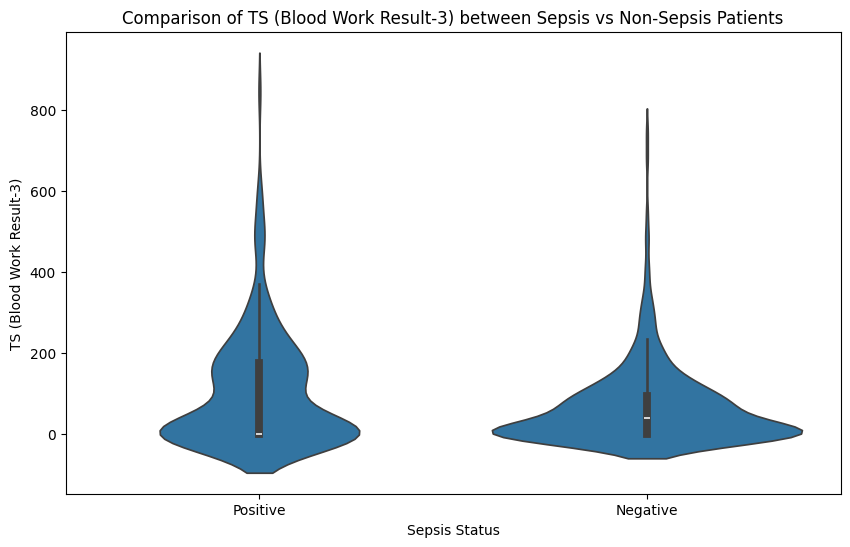

In [131]:
# Example: Box plot comparing vital signs (PR, SK, TS) between sepsis and non-sepsis patients
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='PR', data=df)
plt.title('Comparison of PR (Pulse Rate) between Sepsis vs Non-Sepsis Patients')
plt.xlabel('Sepsis Status')
plt.ylabel('Pulse Rate (PR)')
plt.show()

# Example: Histogram comparing lab results (PL) between sepsis and non-sepsis patients
plt.figure(figsize=(10, 6))
sns.histplot(df, x='PL', hue='Sepssis', bins=20, kde=True)
plt.title('Distribution of PL (Blood Work Result-1) by Sepsis Status')
plt.xlabel('PL (Blood Work Result-1)')
plt.ylabel('Count')
plt.legend(title='Sepsis', labels=['No', 'Yes'])
plt.show()

# Example: Violin plot comparing TS (Blood Work Result-3) between sepsis and non-sepsis patients
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sepssis', y='TS', data=df)
plt.title('Comparison of TS (Blood Work Result-3) between Sepsis vs Non-Sepsis Patients')
plt.xlabel('Sepsis Status')
plt.ylabel('TS (Blood Work Result-3)')
plt.show()


### 2. Accuracy of Sepsis Prediction

**Visualizations:**
- Plot ROC curves and calculate AUC (Area Under the Curve) scores for models trained to predict sepsis.
- Use confusion matrices to visualize model performance metrics like accuracy, sensitivity, and specificity.



### 3. Impact of Missing Values on Prediction Model

**Visualizations:**
- Create bar plots or heatmaps to visualize the distribution of missing values across different features.
- Compare model performance metrics (e.g., accuracy, F1 score) before and after handling missing values using different imputation techniques.

### 4. Influence of Demographic Factors (Age and Insurance Status)

**Visualizations:**
- Use box plots or violin plots to analyze the relationship between age and the likelihood of developing sepsis.
- Create bar plots or count plots to compare the incidence of sepsis based on insurance status (e.g., insured vs. uninsured).

### 5. Role of Comorbidities and Previous Medical History

**Visualizations:**
- Utilize correlation matrices or heatmaps to explore relationships between comorbidities (e.g., diabetes, hypertension) and sepsis development.
- Plot stacked bar charts to visualize the prevalence of specific medical histories among patients who develop sepsis.

### 6. Effect of Time of Admission and Length of ICU Stay

**Visualizations:**
- Plot time series graphs or line plots to show the incidence of sepsis over time (e.g., by hour, day, or week of admission).
- Use scatter plots or regression plots to analyze the correlation between length of ICU stay and the risk of developing sepsis.


## Hypothesis testing